In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [5]:
df = pd.read_csv("kidney_disease.csv")


In [6]:
df.head(1190)


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,1185,63.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,52,8000,5.1,no,no,no,good,no,no,notckd
1186,1186,46.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,43,5700,6.5,no,no,no,good,no,no,notckd
1187,1187,15.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,50,6200,5.2,no,no,no,good,no,no,notckd
1188,1188,51.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,46,9500,6.4,no,no,no,good,no,no,notckd


In [7]:
df['classification'].value_counts()


,count
classification,
ckd,744
notckd,450
ckd\t,6


In [8]:
df.shape

(1200, 26)

In [9]:
df.drop('id', axis=1 , inplace =True)

In [10]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [11]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [12]:
df.head()


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [13]:
df.describe()


,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,1173.000000,1164.000000,1059.000000,1062.000000,1053.000000,1068.000000,1143.000000,1149.000000,939.000000,936.000000,1044.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.155058,13.671867,0.005711,1.351403,1.098146,79.207376,50.458763,5.736123,10.397649,3.190486,2.909793
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,65.000000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1173 non-null   float64
 1   blood_pressure           1164 non-null   float64
 2   specific_gravity         1059 non-null   float64
 3   albumin                  1062 non-null   float64
 4   sugar                    1053 non-null   float64
 5   red_blood_cells          744 non-null    object 
 6   pus_cell                 1005 non-null   object 
 7   pus_cell_clumps          1188 non-null   object 
 8   bacteria                 1188 non-null   object 
 9   blood_glucose_random     1068 non-null   float64
 10  blood_urea               1143 non-null   float64
 11  serum_creatinine         1149 non-null   float64
 12  sodium                   939 non-null    float64
 13  potassium                936 non-null    float64
 14  haemoglobin             

In [15]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1173 non-null   float64
 1   blood_pressure           1164 non-null   float64
 2   specific_gravity         1059 non-null   float64
 3   albumin                  1062 non-null   float64
 4   sugar                    1053 non-null   float64
 5   red_blood_cells          744 non-null    object 
 6   pus_cell                 1005 non-null   object 
 7   pus_cell_clumps          1188 non-null   object 
 8   bacteria                 1188 non-null   object 
 9   blood_glucose_random     1068 non-null   float64
 10  blood_urea               1143 non-null   float64
 11  serum_creatinine         1149 non-null   float64
 12  sodium                   939 non-null    float64
 13  potassium                936 non-null    float64
 14  haemoglobin             

In [17]:
df.columns


Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [18]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']


In [19]:
cat_cols


['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [20]:
num_cols


['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [21]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()}")

red_blood_cells has [nan 'normal' 'abnormal']
pus_cell has ['normal' 'abnormal' nan]
pus_cell_clumps has ['notpresent' 'present' nan]
bacteria has ['notpresent' 'present' nan]
hypertension has ['yes' 'no' nan]
diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan]
coronary_artery_disease has ['no' 'yes' '\tno' nan]
appetite has ['good' 'poor' nan]
peda_edema has ['no' 'yes' nan]
aanemia has ['no' 'yes' nan]
class has ['ckd' 'ckd\t' 'notckd']


In [22]:
df['diabetes_mellitus'].replace(to_replace = {'\tno':'no', '\tyes': 'yes', ' yes':'yes'}, inplace=True)
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value = 'no')
df['class'] = df['class'].replace(to_replace={'ckd\t':'ckd', 'notckd': 'not ckd'})

In [23]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']
for col in cols:
    print(f"{col} has {df[col].unique()}")

diabetes_mellitus has ['yes' 'no' nan]
coronary_artery_disease has ['no' 'yes' nan]
class has ['ckd' 'not ckd']


In [24]:
df['class'] = df['class'].map({'ckd':0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors = 'coerce')

In [25]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']
for col in cols:
    print(f"{col} has {df[col].unique()}")

diabetes_mellitus has ['yes' 'no' nan]
coronary_artery_disease has ['no' 'yes' nan]
class has [0 1]


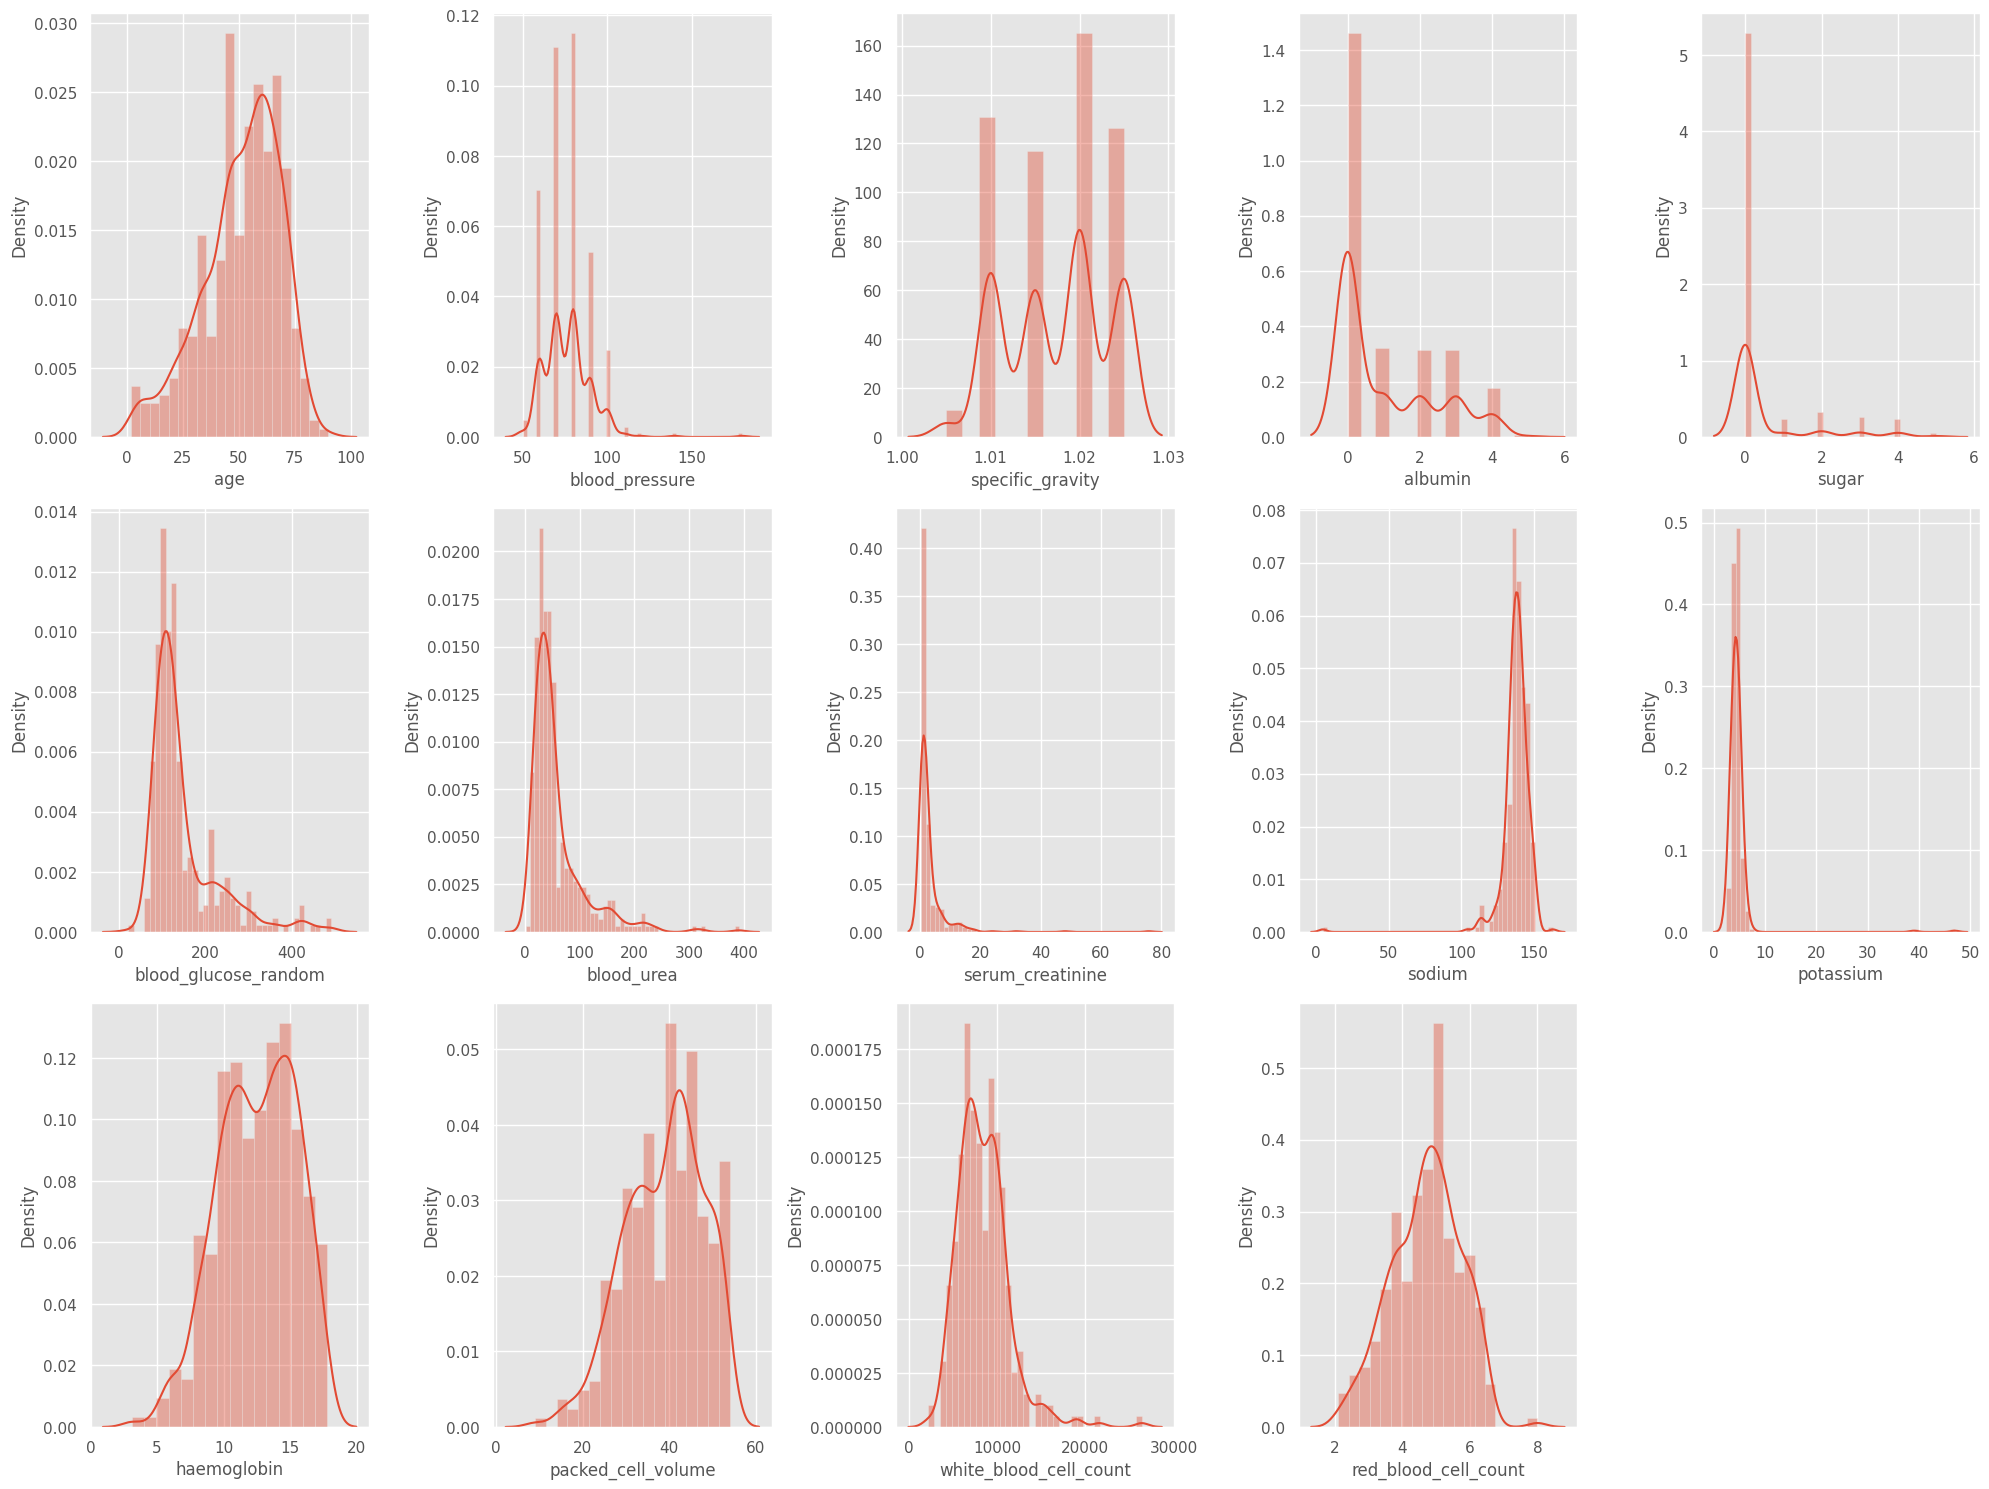

In [26]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

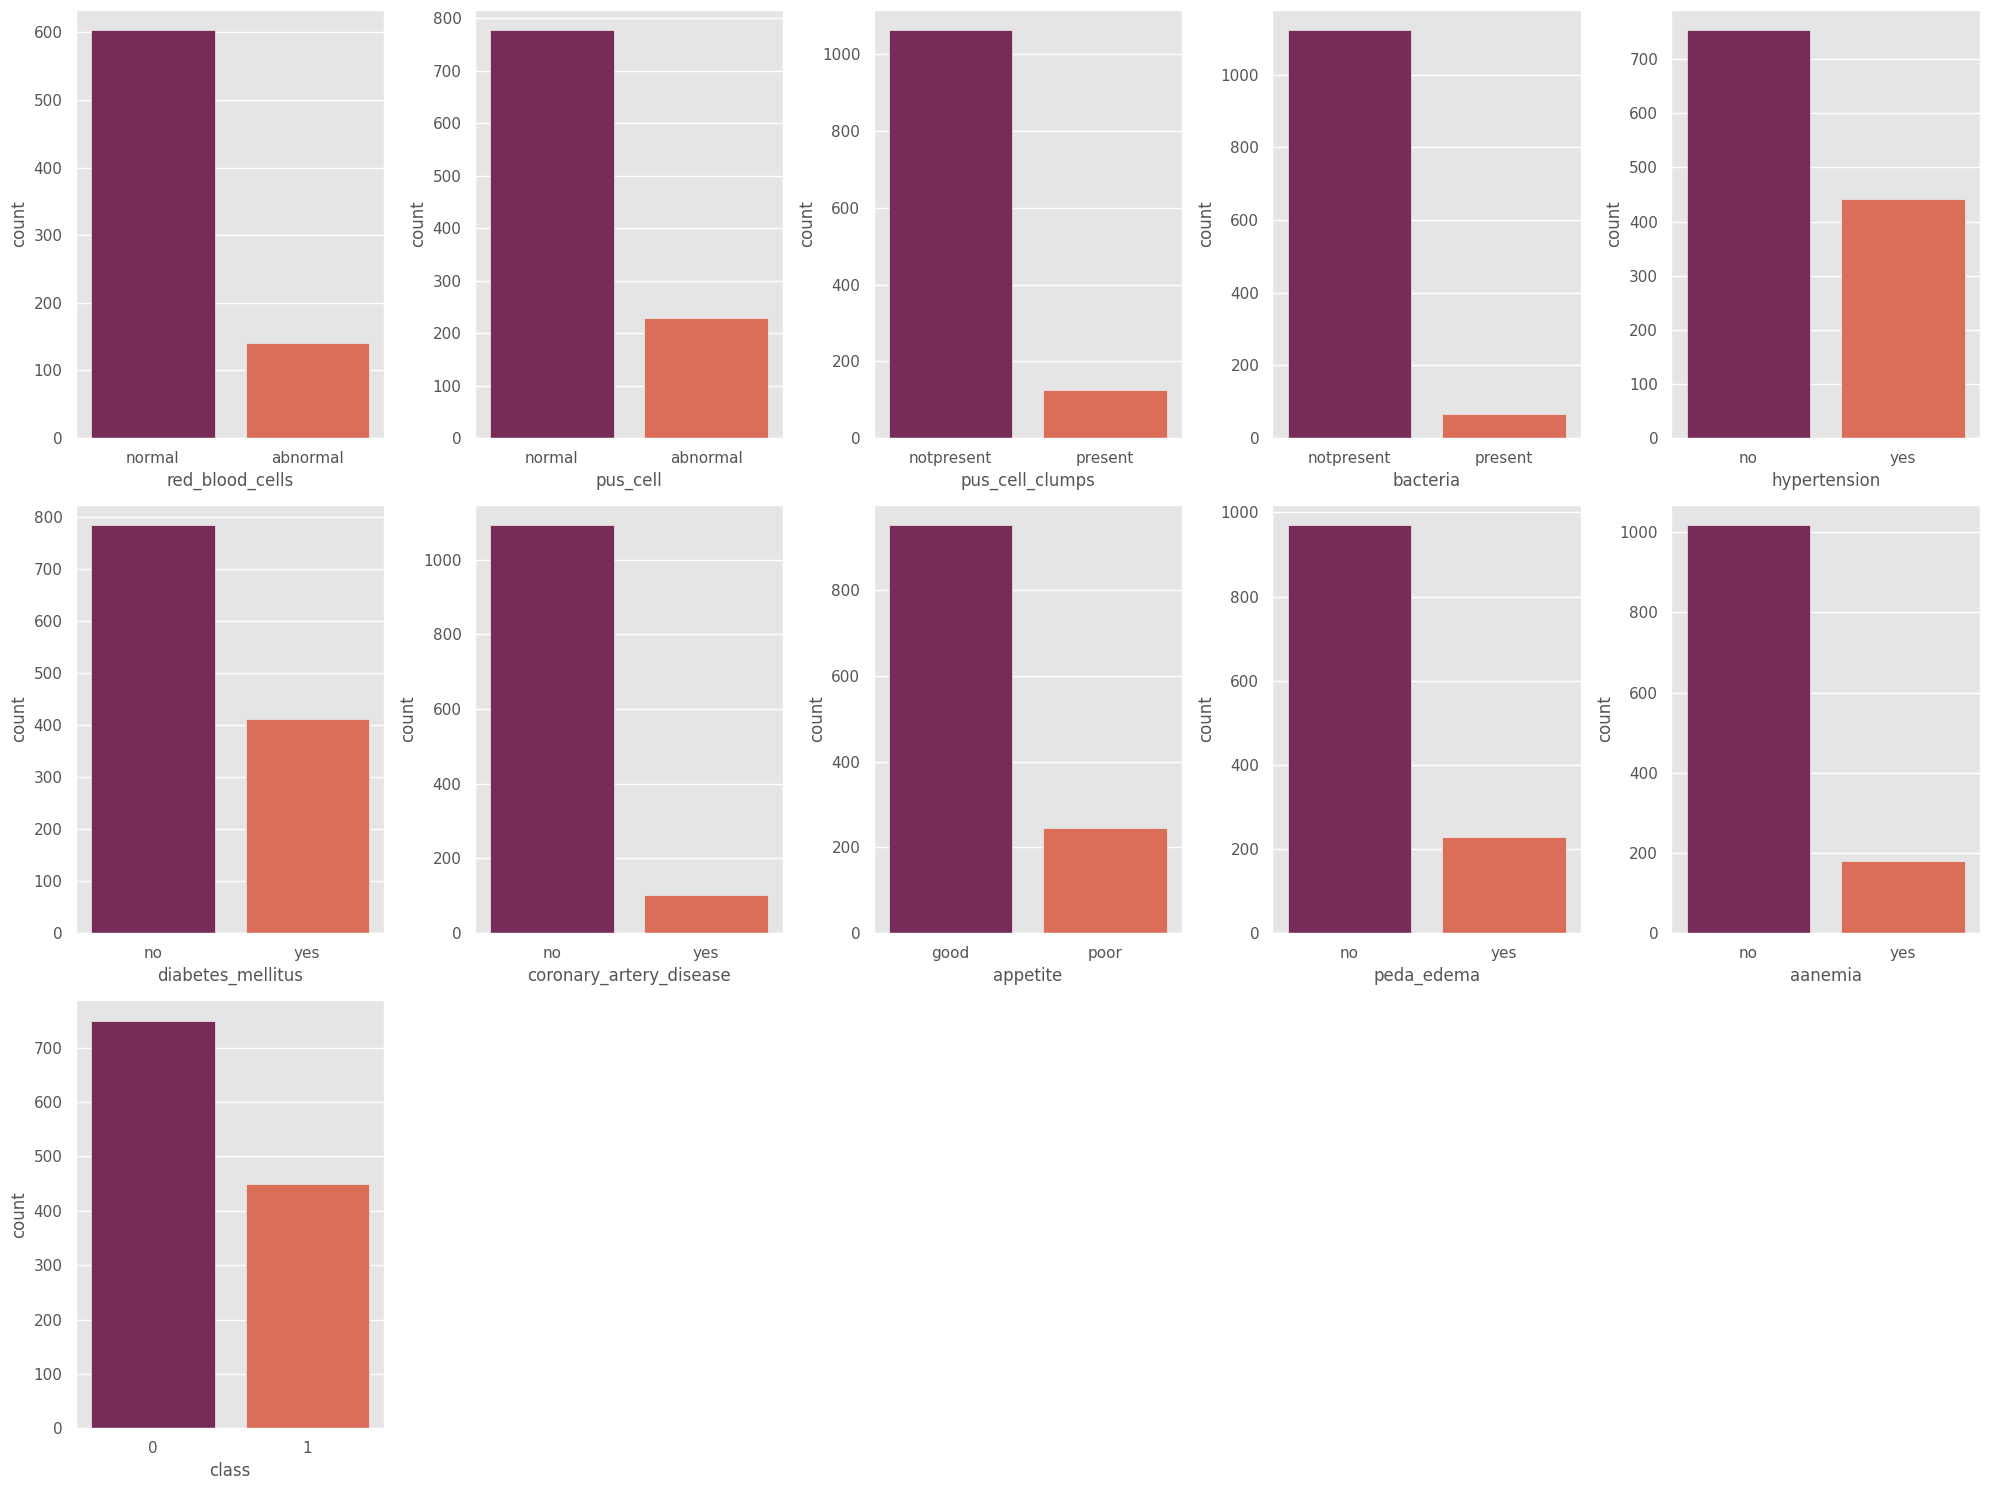

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        import seaborn as sns
        sns.barplot(x=df[column].value_counts().index, y=df[column].value_counts(), palette='rocket')
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [28]:
# Convert non-numeric columns to numeric using label encoding
from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame to preserve the original
df_encoded = df.copy()

# Iterate through each column
for col in df_encoded.columns:
    # Check if the column contains non-numeric data
    if df_encoded[col].dtype == 'object':
        # Use label encoding to convert the non-numeric data to numeric
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Display the correlation matrix
print(correlation_matrix)

                              age  blood_pressure  specific_gravity   albumin  \
age                      1.000000        0.159480         -0.191096  0.122091   
blood_pressure           0.159480        1.000000         -0.218836  0.160689   
specific_gravity        -0.191096       -0.218836          1.000000 -0.469760   
albumin                  0.122091        0.160689         -0.469760  1.000000   
sugar                    0.220866        0.222576         -0.296234  0.269305   
red_blood_cells          0.121924        0.024923         -0.104557 -0.222257   
pus_cell                 0.030580       -0.076983          0.258829 -0.444731   
pus_cell_clumps          0.099692        0.021158         -0.222646  0.298550   
bacteria                -0.010120        0.051808         -0.136611  0.227916   
blood_glucose_random     0.244992        0.160193         -0.374710  0.379464   
blood_urea               0.196985        0.188517         -0.314295  0.453528   
serum_creatinine         0.1

In [29]:
#EDA

In [30]:
def kde(col):
    grid = sns.FacetGrid(df, hue="class", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()


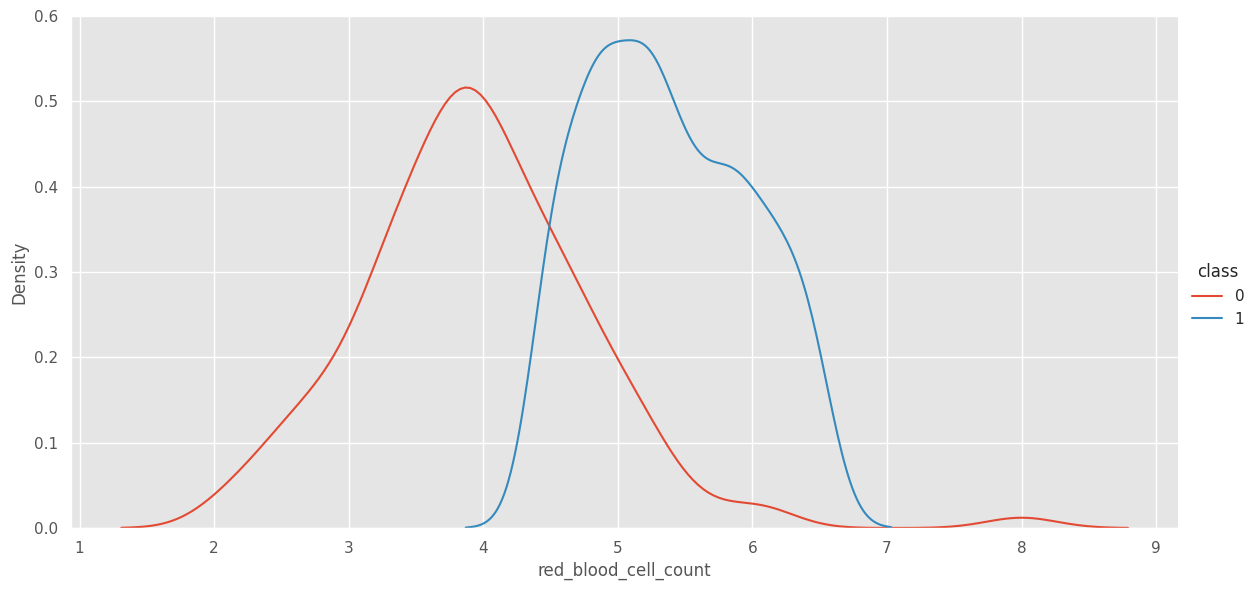

In [31]:
kde('red_blood_cell_count')


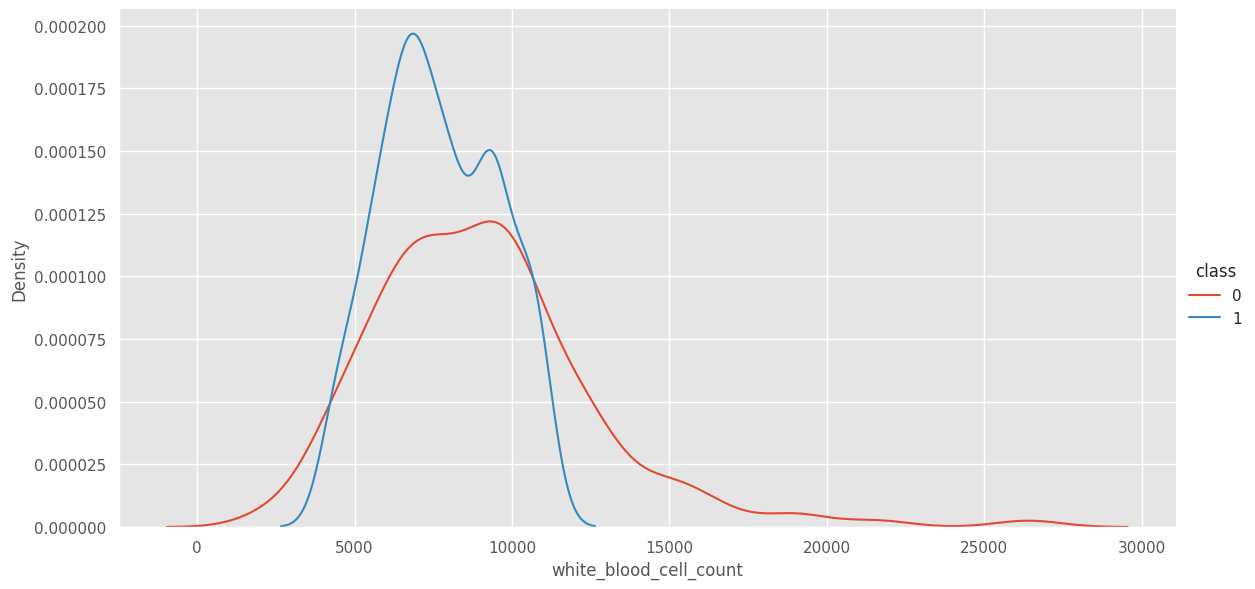

In [32]:
kde('white_blood_cell_count')


In [33]:
# Data Preprocessing


In [34]:
# checking for missing value
df.isnull().sum().sort_values(ascending=False)

,0
red_blood_cells,456
red_blood_cell_count,393
white_blood_cell_count,318
potassium,264
sodium,261
packed_cell_volume,213
pus_cell,195
haemoglobin,156
sugar,147
specific_gravity,141


In [35]:
df[num_cols].isnull().sum()

,0
age,27
blood_pressure,36
specific_gravity,141
albumin,138
sugar,147
blood_glucose_random,132
blood_urea,57
serum_creatinine,51
sodium,261
potassium,264


In [36]:
df[cat_cols].isnull().sum()

,0
red_blood_cells,456
pus_cell,195
pus_cell_clumps,12
bacteria,12
hypertension,6
diabetes_mellitus,6
coronary_artery_disease,6
appetite,3
peda_edema,3
aanemia,3


In [37]:
df.head()


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,0


In [38]:
# two method
# radom sampling->higer null value
# mean/mode-> lower null value

In [39]:
def random_sampling(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [40]:
# random sampling for numerical value
for col in num_cols:
    random_sampling(col)

In [41]:
df[num_cols].isnull().sum()


,0
age,0
blood_pressure,0
specific_gravity,0
albumin,0
sugar,0
blood_glucose_random,0
blood_urea,0
serum_creatinine,0
sodium,0
potassium,0


In [42]:
random_sampling('red_blood_cells')
random_sampling('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [43]:
df[cat_cols].isnull().sum()


,0
red_blood_cells,0
pus_cell,0
pus_cell_clumps,0
bacteria,0
hypertension,0
diabetes_mellitus,0
coronary_artery_disease,0
appetite,0
peda_edema,0
aanemia,0


In [44]:
# Feature Encoding


In [45]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()}")

red_blood_cells has 2
pus_cell has 2
pus_cell_clumps has 2
bacteria has 2
hypertension has 2
diabetes_mellitus has 2
coronary_artery_disease has 2
appetite has 2
peda_edema has 2
aanemia has 2
class has 2


In [46]:
# label_encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [47]:
df.head()


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,172.0,...,38.0,6000.0,5.6,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,3.5,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [48]:
# Model Building


In [49]:
X = df.drop('class', axis = 1)
y = df['class']

In [50]:
X


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,172.0,...,11.3,38.0,6000.0,5.6,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,3.5,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,15.7,47.0,6700.0,4.9,0,0,0,0,0,0
1196,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,16.5,54.0,7800.0,6.2,0,0,0,0,0,0
1197,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,15.8,49.0,6600.0,5.4,0,0,0,0,0,0
1198,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,14.2,51.0,7200.0,5.9,0,0,0,0,0,0


In [51]:
y


,class
0,0
1,0
2,0
3,0
4,0
...,...
1195,1
1196,1
1197,1
1198,1


In [52]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test =  train_test_split(X,y, test_size = 0.4, random_state = 0)

# KNN


In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Train the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predictions
y_pred_knn = knn.predict(X_test)

# Accuracy
knn_acc = accuracy_score(y_test, y_pred_knn)
print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Testing Accuracy of KNN is {accuracy_score(y_test, y_pred_knn)}")

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(f"Confusion Matrix of KNN is \n {cm_knn}\n")

# Classification Report
print(f"Classification Report of KNN is \n{classification_report(y_test, y_pred_knn)}")

# Extract TP, TN, FP, FN
TN, FP, FN, TP = cm_knn.ravel()

# Print TP, TN, FP, FN
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Calculate additional metrics
TPR = TP / (TP + FN)  # True Positive Rate
FNR = FN / (TP + FN)  # False Negative Rate
TNR = TN / (TN + FP)  # True Negative Rate
FPR = FP / (TN + FP)  # False Positive Rate

print(f"True Positive Rate (TPR): {TPR}")
print(f"False Negative Rate (FNR): {FNR}")
print(f"True Negative Rate (TNR): {TNR}")
print(f"False Positive Rate (FPR): {FPR}")

# ROC and AUC
y_prob_knn = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_knn)
knn_auc = roc_auc_score(y_test, y_prob_knn)
print(f"AUC Score of KNN: {knn_auc}")


Training Accuracy of KNN is 0.8652777777777778
Testing Accuracy of KNN is 0.7520833333333333
Confusion Matrix of KNN is 
 [[219  76]
 [ 43 142]]

Classification Report of KNN is 
              precision    recall  f1-score   support

           0       0.84      0.74      0.79       295
           1       0.65      0.77      0.70       185

    accuracy                           0.75       480
   macro avg       0.74      0.75      0.75       480
weighted avg       0.76      0.75      0.75       480

True Positives (TP): 142
True Negatives (TN): 219
False Positives (FP): 76
False Negatives (FN): 43
True Positive Rate (TPR): 0.7675675675675676
False Negative Rate (FNR): 0.23243243243243245
True Negative Rate (TNR): 0.7423728813559322
False Positive Rate (FPR): 0.2576271186440678
AUC Score of KNN: 0.8455978011910215


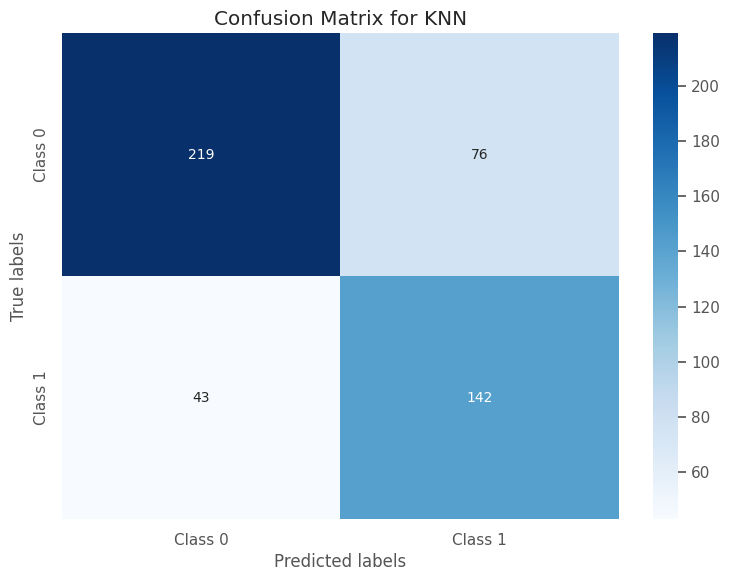

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(y_test, knn.predict(X_test))

# Visualize confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for KNN')
plt.show()


## Random Forest Classifier


In [55]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Initialize and fit the Random Forest model
rand_clf = RandomForestClassifier(
    criterion="gini",
    max_depth=10,
    max_features="sqrt",
    min_samples_leaf=1,
    min_samples_split=7,
    n_estimators=400
)
rand_clf.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = rand_clf.predict(X_train)
y_test_pred = rand_clf.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracy
print(f"Training Accuracy of Random Forest is {train_accuracy}")
print(f"Testing Accuracy of Random Forest is {test_accuracy}")

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print(f"Confusion Matrix of Random Forest is \n{conf_matrix}\n")
print(f"Classification Report of Random Forest is \n{class_report}")

# Extract True Positives, True Negatives, False Positives, False Negatives
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Print TP, TN, FP, FN
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Calculate TPR, FNR, TNR, FPR
TPR = TP / (TP + FN)
FNR = FN / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (TN + FP)

# Print TPR, FNR, TNR, FPR
print(f"True Positive Rate (TPR): {TPR}")
print(f"False Negative Rate (FNR): {FNR}")
print(f"True Negative Rate (TNR): {TNR}")
print(f"False Positive Rate (FPR): {FPR}")

# Calculate AUC Score
if len(set(y_test)) == 2:  # Ensure binary classification for AUC calculation
    auc_score = roc_auc_score(y_test, rand_clf.predict_proba(X_test)[:, 1])
    print(f"AUC Score: {auc_score}")
else:
    print("AUC Score: Not applicable for non-binary classification")


Training Accuracy of Random Forest is 1.0
Testing Accuracy of Random Forest is 0.9895833333333334
Confusion Matrix of Random Forest is 
[[295   0]
 [  5 180]]

Classification Report of Random Forest is 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       295
           1       1.00      0.97      0.99       185

    accuracy                           0.99       480
   macro avg       0.99      0.99      0.99       480
weighted avg       0.99      0.99      0.99       480

True Positives (TP): 180
True Negatives (TN): 295
False Positives (FP): 0
False Negatives (FN): 5
True Positive Rate (TPR): 0.972972972972973
False Negative Rate (FNR): 0.02702702702702703
True Negative Rate (TNR): 1.0
False Positive Rate (FPR): 0.0
AUC Score: 1.0


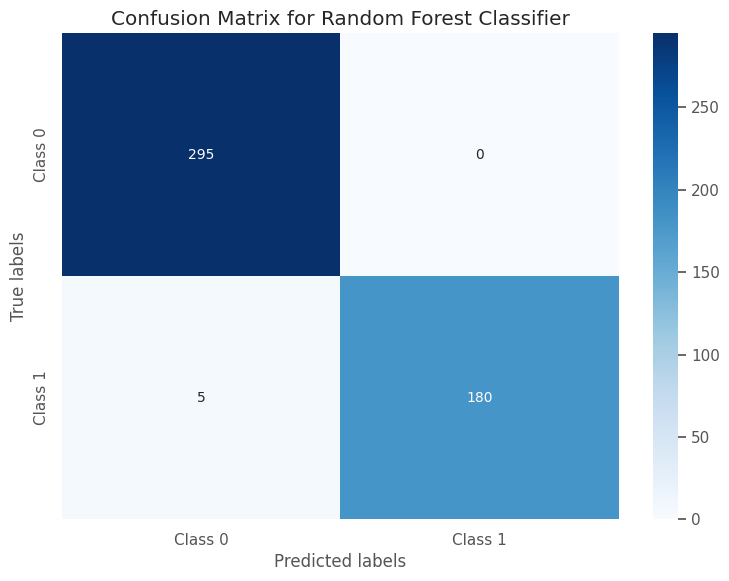

In [56]:
from sklearn.metrics import confusion_matrix


# Calculate confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, rand_clf.predict(X_test))

# Visualize confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


## LOGISTIC REGRESSION


In [57]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Initialize and fit the Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracy
print(f"Training Accuracy of Logistic Regression is {train_accuracy}")
print(f"Testing Accuracy of Logistic Regression is {test_accuracy}")

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print(f"Confusion Matrix of Logistic Regression is \n{conf_matrix}\n")
print(f"Classification Report of Logistic Regression is \n{class_report}")

# Extract True Positives, True Negatives, False Positives, False Negatives
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Print TP, TN, FP, FN
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Calculate TPR, FNR, TNR, FPR
TPR = TP / (TP + FN)
FNR = FN / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (TN + FP)

# Print TPR, FNR, TNR, FPR
print(f"True Positive Rate (TPR): {TPR}")
print(f"False Negative Rate (FNR): {FNR}")
print(f"True Negative Rate (TNR): {TNR}")
print(f"False Positive Rate (FPR): {FPR}")

# Calculate AUC Score
if len(set(y_test)) == 2:  # Ensure binary classification for AUC calculation
    auc_score = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
    print(f"AUC Score: {auc_score}")
else:
    print("AUC Score: Not applicable for non-binary classification")


Training Accuracy of Logistic Regression is 0.8916666666666667
Testing Accuracy of Logistic Regression is 0.90625
Confusion Matrix of Logistic Regression is 
[[259  36]
 [  9 176]]

Classification Report of Logistic Regression is 
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       295
           1       0.83      0.95      0.89       185

    accuracy                           0.91       480
   macro avg       0.90      0.91      0.90       480
weighted avg       0.91      0.91      0.91       480

True Positives (TP): 176
True Negatives (TN): 259
False Positives (FP): 36
False Negatives (FN): 9
True Positive Rate (TPR): 0.9513513513513514
False Negative Rate (FNR): 0.04864864864864865
True Negative Rate (TNR): 0.8779661016949153
False Positive Rate (FPR): 0.12203389830508475
AUC Score: 0.9504351809436556


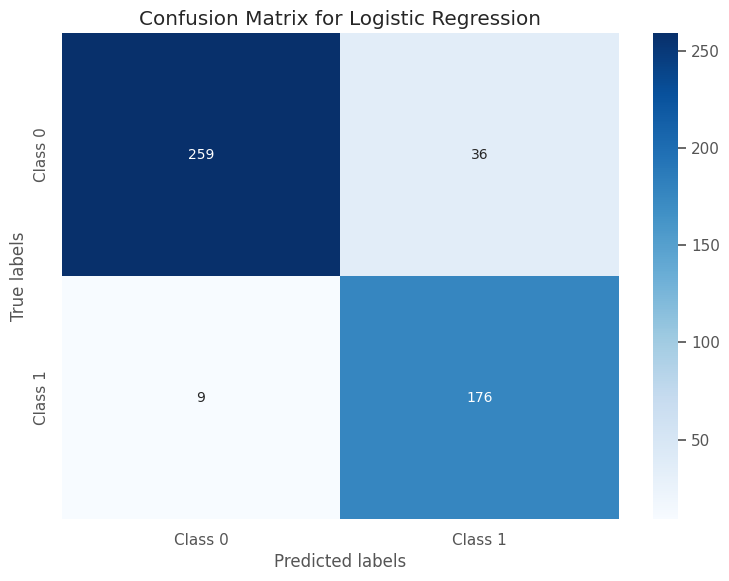

In [58]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix for Logistic Regression
lr_cm = confusion_matrix(y_test, lr.predict(X_test))

# Visualize confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


## SVM

In [59]:
# SVM
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Initialize the SVM model
svm = SVC(probability=True)

# Define the parameter grid
parameter_grid = {
    'gamma': [0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05, 0.1, 0.5, 1, 10, 15, 20]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(svm, parameter_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Train the SVC model with the best parameters
svm = SVC(gamma=grid_search.best_params_['gamma'], C=grid_search.best_params_['C'], probability=True)
svm.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracy
print(f"Training Accuracy of SVC is {train_accuracy}")
print(f"Testing Accuracy of SVC is {test_accuracy}")

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print(f"Confusion Matrix of SVC is \n{conf_matrix}\n")
print(f"Classification Report of SVC is \n{class_report}")

# Extract True Positives, True Negatives, False Positives, False Negatives
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Print TP, TN, FP, FN
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Calculate TPR, FNR, TNR, FPR
TPR = TP / (TP + FN)
FNR = FN / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (TN + FP)

# Print TPR, FNR, TNR, FPR
print(f"True Positive Rate (TPR): {TPR}")
print(f"False Negative Rate (FNR): {FNR}")
print(f"True Negative Rate (TNR): {TNR}")
print(f"False Positive Rate (FPR): {FPR}")

# Calculate AUC Score
if len(set(y_test)) == 2:  # Ensure binary classification for AUC calculation
    auc_score = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])
    print(f"AUC Score: {auc_score}")
else:
    print("AUC Score: Not applicable for non-binary classification")


Best Parameters: {'C': 10, 'gamma': 0.001}
Best Cross-Validation Score: 0.9013888888888889
Training Accuracy of SVC is 1.0
Testing Accuracy of SVC is 0.8916666666666667
Confusion Matrix of SVC is 
[[277  18]
 [ 34 151]]

Classification Report of SVC is 
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       295
           1       0.89      0.82      0.85       185

    accuracy                           0.89       480
   macro avg       0.89      0.88      0.88       480
weighted avg       0.89      0.89      0.89       480

True Positives (TP): 151
True Negatives (TN): 277
False Positives (FP): 18
False Negatives (FN): 34
True Positive Rate (TPR): 0.8162162162162162
False Negative Rate (FNR): 0.1837837837837838
True Negative Rate (TNR): 0.9389830508474576
False Positive Rate (FPR): 0.061016949152542375
AUC Score: 0.9376454420522218


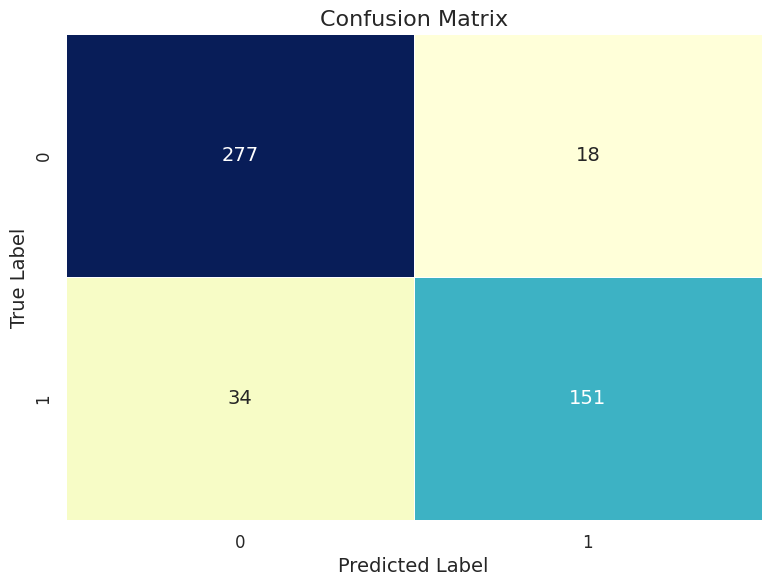

In [60]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Increase font scale for better readability
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False, annot_kws={"size": 14}, linewidths=.5)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



## Decision Tree

In [61]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and fit the Decision Tree model
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracy
print(f"Training Accuracy of Decision Tree Classifier is {train_accuracy}")
print(f"Testing Accuracy of Decision Tree Classifier is {test_accuracy}")

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print(f"Confusion Matrix of Decision Tree Classifier is \n{conf_matrix}\n")
print(f"Classification Report of Decision Tree Classifier is \n{class_report}")

# Extract True Positives, True Negatives, False Positives, False Negatives
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Print TP, TN, FP, FN
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Calculate TPR, FNR, TNR, FPR
TPR = TP / (TP + FN)
FNR = FN / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (TN + FP)

# Print TPR, FNR, TNR, FPR
print(f"True Positive Rate (TPR): {TPR}")
print(f"False Negative Rate (FNR): {FNR}")
print(f"True Negative Rate (TNR): {TNR}")
print(f"False Positive Rate (FPR): {FPR}")

# Calculate AUC Score
if len(set(y_test)) == 2:  # Ensure binary classification for AUC calculation
    auc_score = roc_auc_score(y_test, dtc.predict_proba(X_test)[:, 1])
    print(f"AUC Score: {auc_score}")
else:
    print("AUC Score: Not applicable for non-binary classification")



Training Accuracy of Decision Tree Classifier is 1.0
Testing Accuracy of Decision Tree Classifier is 0.975
Confusion Matrix of Decision Tree Classifier is 
[[290   5]
 [  7 178]]

Classification Report of Decision Tree Classifier is 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       295
           1       0.97      0.96      0.97       185

    accuracy                           0.97       480
   macro avg       0.97      0.97      0.97       480
weighted avg       0.97      0.97      0.97       480

True Positives (TP): 178
True Negatives (TN): 290
False Positives (FP): 5
False Negatives (FN): 7
True Positive Rate (TPR): 0.9621621621621622
False Negative Rate (FNR): 0.03783783783783784
True Negative Rate (TNR): 0.9830508474576272
False Positive Rate (FPR): 0.01694915254237288
AUC Score: 0.9726065048098946


Testing Accuracy of Decision Tree Classifier is 0.9791666666666666
Confusion Matrix of Decision Tree Classifier is 
[[291   4]
 [  6 179]]



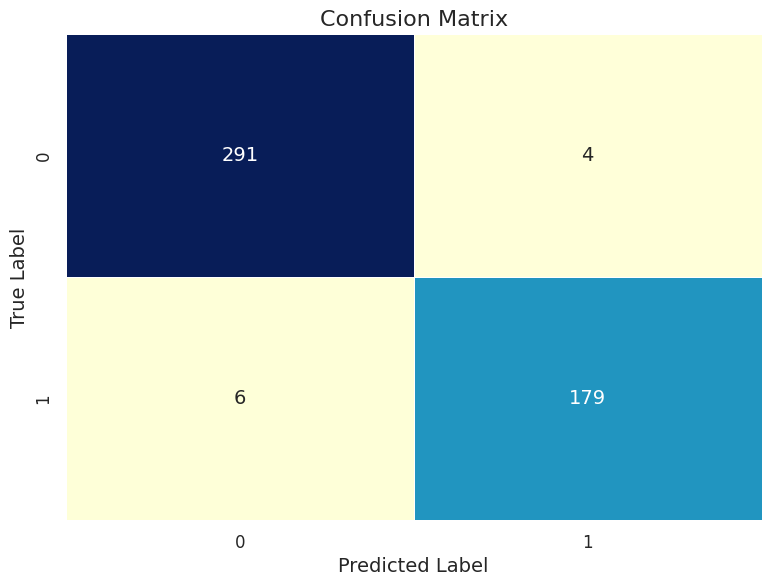

In [62]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and fit the Decision Tree model
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Predict on test set
y_test_pred = dtc.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy of Decision Tree Classifier is {test_accuracy}")

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print(f"Confusion Matrix of Decision Tree Classifier is \n{conf_matrix}\n")

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Increase font scale for better readability
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False, annot_kws={"size": 14}, linewidths=.5)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


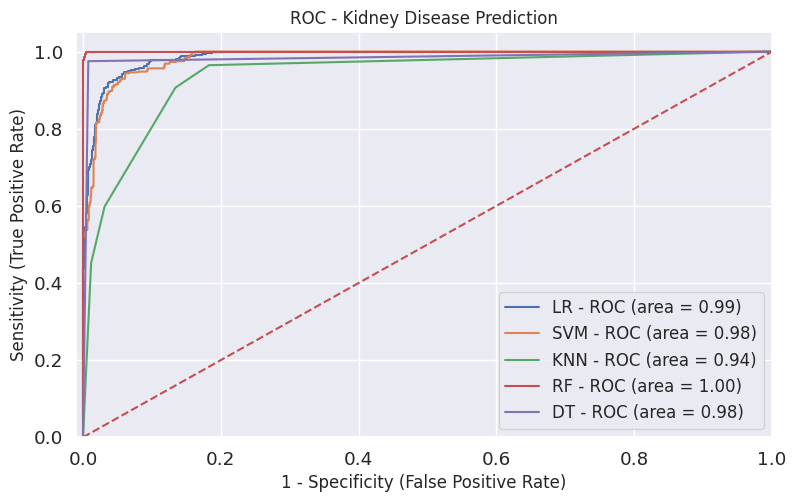

In [63]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics

# Binarize the output (replace with actual class labels)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_test_bin.shape[1]

# Define models and their labels
models = [
    {'label': 'LR', 'model': lr},
    {'label': 'SVM', 'model': svm},
    {'label': 'KNN', 'model': knn},
    {'label': 'RF', 'model': rand_clf},
    {'label': 'DT', 'model': dtc},

]

plt.figure(figsize=(8, 5))

# Loop through each model
for m in models:
    model = OneVsRestClassifier(m['model'])
    model.fit(X_train, label_binarize(y_train, classes=[0, 1, 2, 3]))  # Binarize y_train

    # Predict probabilities
    y_score = model.predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

    # Plot micro-average ROC curve
    plt.plot(fpr["micro"], tpr["micro"], label='%s - ROC (area = %0.2f)' % (m['label'], roc_auc["micro"]))

# Plot the diagonal
plt.plot([0, 1], [0, 1], 'r--')

# Set plot limits and labels
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Kidney Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)

# Save the plot
plt.savefig("roc_kidney.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

## Ensemble

In [64]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the dataset
df = pd.read_csv("kidney_disease.csv")

# 2. Data Preprocessing
df_numeric = df.select_dtypes(include=['number'])
df_numeric.fillna(df_numeric.mean(), inplace=True)
df_categorical = df.select_dtypes(include=['object'])
le = LabelEncoder()
df_categorical_encoded = df_categorical.apply(le.fit_transform)
df_processed = pd.concat([df_numeric, df_categorical_encoded], axis=1)

# Split into features and target
X = df_processed.drop(columns=['classification'])
y = df_processed['classification']

# 3. Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# 4. Initialize Base Models
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

# 5. Train Base Models
rf.fit(X_train, y_train)
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)

# Initialize classifiers
classifiers = {
    'rf': rf,
    'knn': knn,
    'dt': dt
}

# Create a voting classifier using all three classifiers with soft voting
combo = ('rf', 'knn', 'dt')
models = [classifiers[clf_name] for clf_name in combo]
voting_clf = VotingClassifier(estimators=[(clf_name, clf) for clf_name, clf in zip(combo, models)], voting='soft')
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']

# Calculate confusion matrix and derive metrics
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Initialize metrics
tpr = fnr = tnr = fpr = auc_score = None

if cm.shape == (2, 2):  # Binary classification case
    tn, fp, fn, tp = cm.ravel()
    tpr = tp / (tp + fn)  # True Positive Rate
    fnr = fn / (tp + fn)  # False Negative Rate
    tnr = tn / (tn + fp)  # True Negative Rate
    fpr = fp / (tn + fp)  # False Positive Rate

    # Calculate AUC score
    y_prob = voting_clf.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_prob)
else:  # Multiclass classification case
    auc_score = roc_auc_score(y_test, voting_clf.predict_proba(X_test), multi_class='ovr')

# Print metrics
print(f"Combination: {combo}, Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1_score}")
print(f"AUC Score: {auc_score}")


train_accuracy = dt.score(X_train, y_train)
test_accuracy = dt.score(X_test, y_test)

print(f"Training Accuracy of ensemble Classifier is {train_accuracy}")
print(f"Testing Accuracy of ensemble Classifier is {test_accuracy}")

# Confusion Matrix and Classification Report for Decision Tree
conf_matrix = confusion_matrix(y_test, dt.predict(X_test))
class_report = classification_report(y_test, dt.predict(X_test))
print("Classification Report for Decision Tree:\n", class_report)

# Calculate TP, TN, FP, FN
if conf_matrix.shape == (2, 2):
    tn, fp, fn, tp = conf_matrix.ravel()
    # Calculate TPR, FNR, TNR, FPR
    TPR = tp / (tp + fn)
    FNR = fn / (tp + fn)
    TNR = tn / (tn + fp)
    FPR = fp / (tn + fp)

    # Print TP, TN, FP, FN
    print(f"True Positives (TP): {tp}")
    print(f"True Negatives (TN): {tn}")
    print(f"False Positives (FP): {fp}")
    print(f"False Negatives (FN): {fn}")

    # Print TPR, FNR, TNR, FPR
    print(f"True Positive Rate (TPR): {TPR}")
    print(f"False Negative Rate (FNR): {FNR}")
    print(f"True Negative Rate (TNR): {TNR}")
    print(f"False Positive Rate (FPR): {FPR}")



Confusion Matrix:
 [[291   0   0]
 [  2   2   0]
 [  0   0 185]]
Combination: ('rf', 'knn', 'dt'), Accuracy: 0.9958333333333333
Precision: 0.9958617747440273
Recall: 0.9958333333333333
F1-score: 0.9951460235920853
AUC Score: 1.0
Training Accuracy of ensemble Classifier is 1.0
Testing Accuracy of ensemble Classifier is 0.9958333333333333
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       291
           1       1.00      1.00      1.00         4
           2       1.00      0.99      0.99       185

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



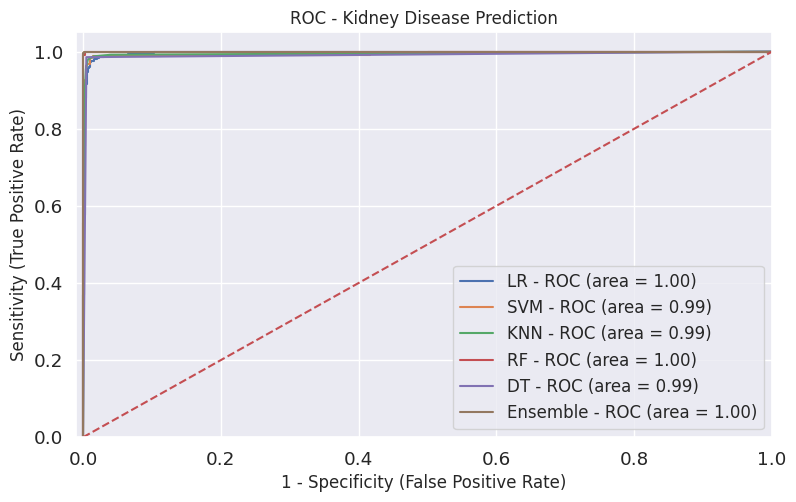

In [65]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics

# Binarize the output (replace with actual class labels)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_test_bin.shape[1]

# Define models and their labels
models = [
    {'label': 'LR', 'model': lr},
    {'label': 'SVM', 'model': svm},
    {'label': 'KNN', 'model': knn},
    {'label': 'RF', 'model': rand_clf},
    {'label': 'DT', 'model': dtc},
    {'label': 'Ensemble', 'model': voting_clf}
]

plt.figure(figsize=(8, 5))

# Loop through each model
for m in models:
    model = OneVsRestClassifier(m['model'])
    model.fit(X_train, label_binarize(y_train, classes=[0, 1, 2, 3]))  # Binarize y_train

    # Predict probabilities
    y_score = model.predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

    # Plot micro-average ROC curve
    plt.plot(fpr["micro"], tpr["micro"], label='%s - ROC (area = %0.2f)' % (m['label'], roc_auc["micro"]))

# Plot the diagonal
plt.plot([0, 1], [0, 1], 'r--')

# Set plot limits and labels
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Kidney Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)

# Save the plot
plt.savefig("roc_kidney.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()


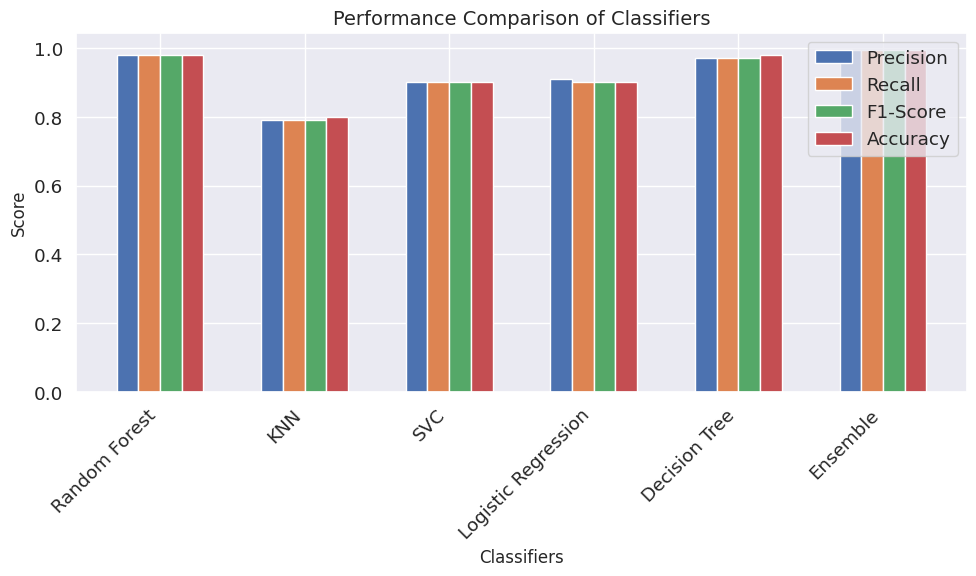

In [66]:
classifiers = {
    'Random Forest': {'precision': 0.98, 'recall': 0.98, 'f1-score': 0.98, 'accuracy': 0.98},
    'KNN': {'precision': 0.79, 'recall': 0.79, 'f1-score': 0.79, 'accuracy': 0.798},
    'SVC': {'precision': 0.90, 'recall': 0.90, 'f1-score': 0.90, 'accuracy': 0.90},
    'Logistic Regression': {'precision': 0.91, 'recall': 0.90, 'f1-score': 0.90, 'accuracy': 0.90},
    'Decision Tree': {'precision': 0.97, 'recall': 0.97, 'f1-score': 0.97, 'accuracy': 0.98},
    'Ensemble': {'precision': 0.995, 'recall': 0.995, 'f1-score':0.995 , 'accuracy': 0.995}
}

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(classifiers))
classifier_names = list(classifiers.keys())
precision = [classifiers[name]['precision'] for name in classifier_names]
recall = [classifiers[name]['recall'] for name in classifier_names]
f1_score = [classifiers[name]['f1-score'] for name in classifier_names]
accuracy = [classifiers[name]['accuracy'] for name in classifier_names]

bar_width = 0.15
index = x
ax.bar(index, precision, bar_width, label='Precision')
index = [i + bar_width for i in index]
ax.bar(index, recall, bar_width, label='Recall')
index = [i + bar_width for i in index]
ax.bar(index, f1_score, bar_width, label='F1-Score')
index = [i + bar_width for i in index]
ax.bar(index, accuracy, bar_width, label='Accuracy')

ax.set_xlabel('Classifiers', fontsize=12)
ax.set_xticks([i + 1.5 * bar_width for i in x])
ax.set_xticklabels(classifier_names, rotation=45, ha='right')
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Performance Comparison of Classifiers', fontsize=14)
ax.legend()

plt.tight_layout()
plt.show()

Shape of original data: (1200, 26)
Shape after one-hot encoding: (1200, 218)
Shape after PCA: (1200, 10)
Training set size: (960, 10)
Test set size: (240, 10)
First 5 target values in training set:
867       ckd
741    notckd
467       ckd
442       ckd
610       ckd
Name: classification, dtype: object


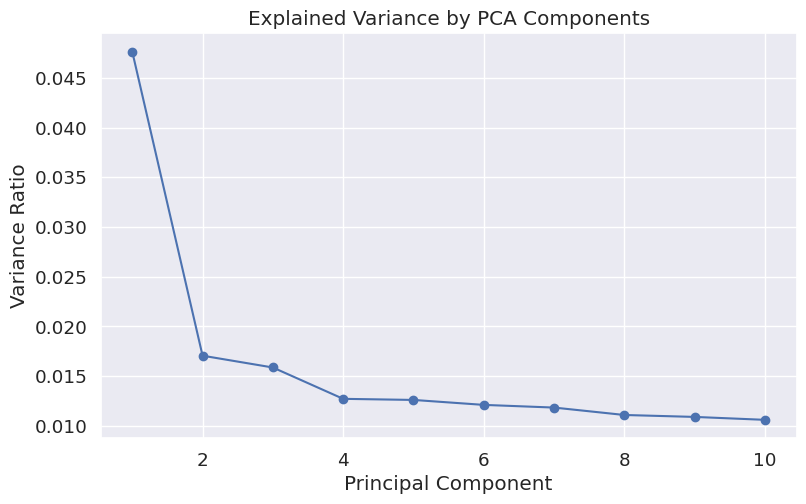

In [67]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("kidney_disease.csv")

# Drop rows with missing target if applicable
df.dropna(subset=['classification'], inplace=True)

# Separate target and features
X = df.drop('classification', axis=1)
y = df['classification']

# Convert categorical features to numeric using one-hot encoding
X = pd.get_dummies(X)

# Handle missing values
X.fillna(X.mean(), inplace=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Updated: Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=0)

# Output shapes
print("Shape of original data:", df.shape)
print("Shape after one-hot encoding:", X.shape)
print("Shape after PCA:", X_pca.shape)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("First 5 target values in training set:")
print(y_train.head())

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.grid(True)
plt.show()


In [68]:
# Step 1: Import libraries and scale data (without PCA)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [69]:
# Step 2: Train a model on scaled data (no PCA)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [70]:
# Step 3: Install and import LIME
!pip install lime --quiet
from lime.lime_tabular import LimeTabularExplainer



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [71]:
# Step 4: Initialize LIME explainer with original features
explainer = LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=X.columns.tolist(),
    class_names=['Not CKD', 'CKD'],
    mode='classification'
)



In [72]:
# Step 5: Explain one prediction using LIME
i = 0  # Choose test sample index
exp = explainer.explain_instance(
    data_row=X_test_scaled[i],
    predict_fn=model.predict_proba
)
exp.show_in_notebook(show_all=False)


  0%|          | 0/50 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

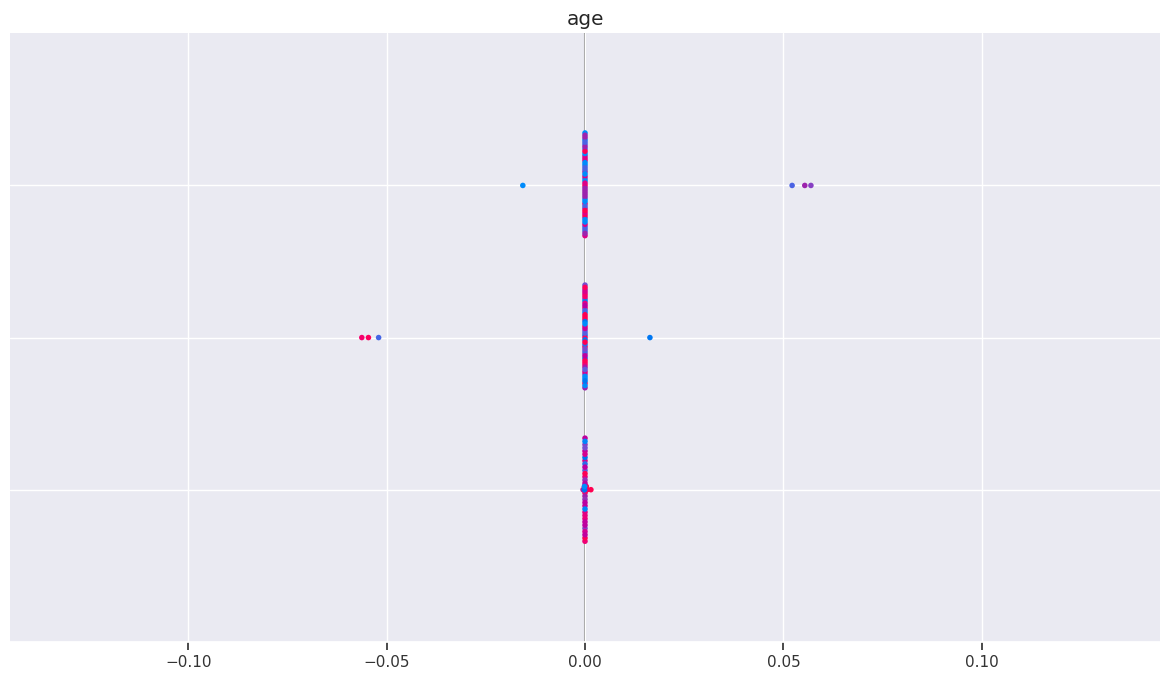

In [75]:
import shap
# import shap
# explainer = shap.KernelExplainer(voting_clf.predict_proba, X_train[:100])
# shap_values = explainer.shap_values(X_test[:50])  # Use smaller data due to slowness

# shap.summary_plot(shap_values, X_test[:50], feature_names=X.columns)

# import shap

# # Use the same PCA-transformed training data
# explainer = shap.KernelExplainer(voting_clf.predict_proba, X_train[:100])  # Already PCA-applied

# # Use PCA-transformed test data
# shap_values = explainer.shap_values(X_test[:50])

# # Plot SHAP summary (use PCA component names since original features are lost)
# shap.summary_plot(shap_values, X_test[:50], feature_names=[f'PC{i+1}' for i in range(X_test.shape[1])])


# Skip PCA, just scale the data
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Train your voting_clf on X_train
voting_clf.fit(X_train, y_train)

# SHAP with original features
explainer = shap.KernelExplainer(voting_clf.predict_proba, X_train[:100])
shap_values = explainer.shap_values(X_test[:50])
shap.summary_plot(shap_values, X_test[:50], feature_names=X.columns)
